In [ ]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt

#### 함수

In [ ]:
def P(beta):
    return 1 - np.exp(-2 * beta)

def find(i, ptr):
    if ptr[i] < 0:
        return i
    else:
        ptr[i] = find(ptr[i], ptr)
        return ptr[i]

def union(r1, r2, ptr):
    if r1 != r2:
        if ptr[r1] > ptr[r2]:
            ptr[r2] += ptr[r1]
            ptr[r1] = r2
        else:
            ptr[r1] += ptr[r2]
            ptr[r2] = r1

def cluster_flip(spins, L, beta, ptr):
    N = L * L
    bonds = []

    for i in range(L):
        for j in range(L):
            current = i * L + j
            right = i * L + (j + 1) % L
            down = ((i + 1) % L) * L + j
            bonds.append((current, right))
            bonds.append((current, down))

    # 클러스터를 초기화
    ptr[:] = -1

    # 본드를 통해 클러스터 생성
    for bond in bonds:
        choice_spin_index, neighbor_spin_index = bond
        if spins[choice_spin_index] == spins[neighbor_spin_index]:
            if P(beta) > rd.random():
                r1 = find(choice_spin_index, ptr)
                r2 = find(neighbor_spin_index, ptr)
                union(r1, r2, ptr)

    clusters = set()
    for i in range(N):
        clusters.add(find(i, ptr))

    # 무작위로 클러스터를 뒤집음
    for cluster in clusters:
        if rd.random() < 0.5:
            for i in range(N):
                if find(i, ptr) == cluster:
                    spins[i] *= -1

    return spins

### 실행 코드

### L = 5 일떄

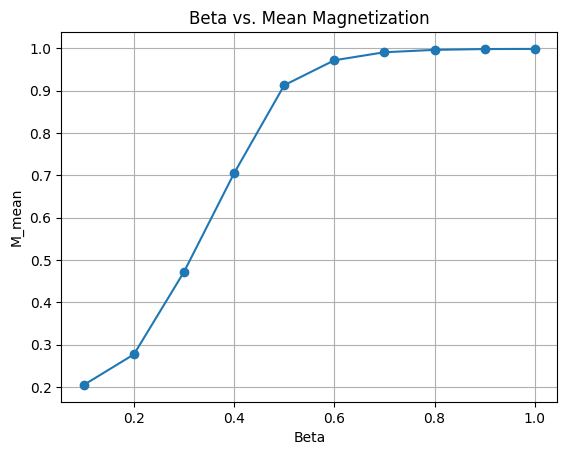

In [ ]:
# 설정된 파라미터
L = 5
beta_list = np.linspace(0.1, 1, 10)  # beta 값 리스트
M_mean_list = []

# 베타 값에 따른 평균 자기를 계산
for beta in beta_list:
    m_list = []
    seed_spin = np.random.choice([-1, 1], size=(L * L))  # 초기 스핀 배열
    ptr = np.ones(L * L, dtype=int) * -1  # 클러스터 배열 초기화
    for j in range(1000):
        seed_spin = cluster_flip(seed_spin, L, beta, ptr)  # 클러스터 플립 수행
        m = np.mean(seed_spin)  # 평균 자기 계산
        m_list.append(abs(m))
    M_mean_list.append(np.mean(m_list))  # 평균 자기의 절댓값을 리스트에 추가

# 결과를 그래프로 표시
plt.plot(beta_list, M_mean_list, marker='o')
plt.xlabel('Beta')
plt.ylabel('M_mean')
plt.title('Beta vs. Mean Magnetization')
plt.grid(True)
plt.show()

### L = 10 일때

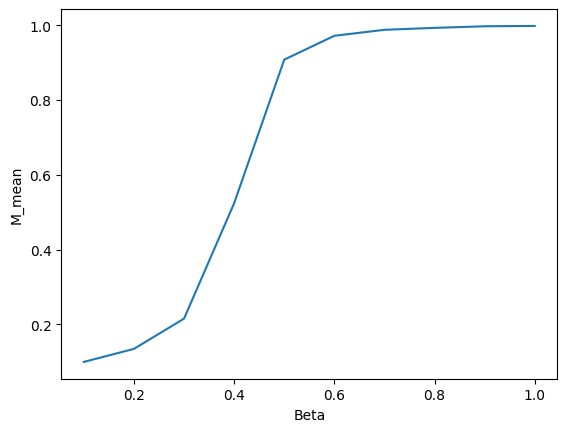

In [ ]:
L = 10
beta_list = np.linspace(0.1, 1, 10)
M_mean_list = []

for beta in beta_list:
    m_list = []
    origin_spin = np.random.choice([-1, 1], size=(L * L))
    ptr = np.ones(L * L, dtype=int) * -1
    for j in range(1000):
        origin_spin = cluster_flip(origin_spin, L, beta, ptr)
        m = np.mean(origin_spin)
        m_list.append(abs(m))
    M_mean_list.append(np.mean(m_list))

plt.plot(beta_list, M_mean_list)
plt.xlabel('Beta')
plt.ylabel('M_mean')
plt.show()

### L = 20 일때

In [ ]:
L = 20
beta_list = np.linspace(0.1, 1, 10)
M_mean_list = []

for beta in beta_list:
    m_list = []
    seed_spin = np.random.choice([-1, 1], size=(L * L))
    for j in range(1000):
        seed_spin = cluster_flip(seed_spin, L, beta)
        m = np.mean(seed_spin)
        m_list.append(abs(m))
    M_mean_list.append(np.mean(m_list))

plt.plot(beta_list, M_mean_list)
plt.xlabel('Beta')
plt.ylabel('M_mean')
plt.show()